# <center style='color:silver'> `BIRCH` clustering - Example using `titanic` dataset</center>

## 1. Import required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import Birch
from sklearn import metrics

## 2. Load `titanic` dataset

In [2]:
titanic = pd.read_csv('titanic.csv')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
titanic.shape

(891, 15)

## 3. Select some features and the targets

In [4]:
features = titanic[['pclass', 'sex', 'fare', 'embarked']]
features.head()

,pclass,sex,fare,embarked
0,3,male,7.2500,S
1,1,female,71.2833,C
2,3,female,7.9250,S
3,1,female,53.1000,S
4,3,male,8.0500,S


In [5]:
features.shape

(891, 4)

In [6]:
targets = titanic[['survived']]
targets.head()

,survived
0,0
1,1
2,1
3,1
4,0


In [7]:
titanic.survived.unique()

array([0, 1])

In [8]:
targets.isnull().any().any()

False

In [9]:
features.isnull().any().any()

True

In [10]:
features.isnull().sum()

pclass      0
sex         0
fare        0
embarked    2
dtype: int64

## 4. Fill NaN values

In [11]:
df = features.fillna(method='ffill')
df.head()

,pclass,sex,fare,embarked
0,3,male,7.2500,S
1,1,female,71.2833,C
2,3,female,7.9250,S
3,1,female,53.1000,S
4,3,male,8.0500,S


In [12]:
df.shape

(891, 4)

In [13]:
df.isnull().any().any()

False

## 5. Replace categorical values with some indicator values

In [14]:
new_df = pd.get_dummies(df, columns=['sex', 'embarked'])
new_df.head()

,pclass,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,3,7.2500,0,1,0,0,1
1,1,71.2833,1,0,1,0,0
2,3,7.9250,1,0,0,0,1
3,1,53.1000,1,0,0,0,1
4,3,8.0500,0,1,0,0,1


In [15]:
new_df.shape

(891, 7)

## 6. Perform preprocessing

In [16]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(new_df)

In [17]:
scaled.shape

(891, 7)

## 7. Scaled dataframe

In [18]:
df_scaled = pd.DataFrame(scaled, columns=new_df.columns)
df_scaled.head()

,pclass,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,1.0,0.014151,0.0,1.0,0.0,0.0,1.0
1,0.0,0.139136,1.0,0.0,1.0,0.0,0.0
2,1.0,0.015469,1.0,0.0,0.0,0.0,1.0
3,0.0,0.103644,1.0,0.0,0.0,0.0,1.0
4,1.0,0.015713,0.0,1.0,0.0,0.0,1.0


In [19]:
df_scaled.shape

(891, 7)

## 8. Perform `BIRCH_clustering` considering 3 clusters

In [20]:
birch = Birch(n_clusters=2)
birch.fit(df_scaled)
preds = birch.labels_

## 9. Add two new columns to the scaled dataframe

In [21]:
df_scaled['target'] = targets
df_scaled['prediction'] = preds
df_scaled.head()

,pclass,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,target,prediction
0,1.0,0.014151,0.0,1.0,0.0,0.0,1.0,0,0
1,0.0,0.139136,1.0,0.0,1.0,0.0,0.0,1,1
2,1.0,0.015469,1.0,0.0,0.0,0.0,1.0,1,1
3,0.0,0.103644,1.0,0.0,0.0,0.0,1.0,1,1
4,1.0,0.015713,0.0,1.0,0.0,0.0,1.0,0,0


In [22]:
df_scaled.shape

(891, 9)

In [23]:
print(df_scaled.target.unique())
print(df_scaled.prediction.unique())

[0 1]
[0 1]


## 10. Clustering comparison between targets and predictions

In [24]:
cm = metrics.confusion_matrix(targets, preds)

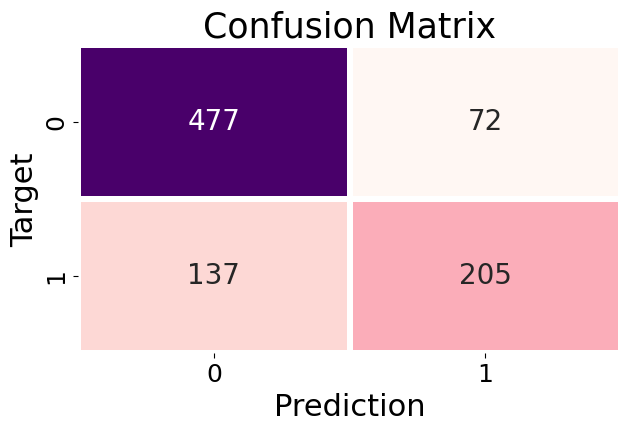

In [25]:
plt.figure(figsize=(7, 4))

sns.heatmap(cm, annot=True, fmt='d', linewidth=4, cbar=False, annot_kws={'size': 20}, cmap='RdPu')

plt.xlabel('Prediction', fontsize=22)
plt.ylabel('Target', fontsize=22)
plt.title('Confusion Matrix', fontsize=25)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18);

In [26]:
df_scaled.target.value_counts()

0    549
1    342
Name: target, dtype: int64

In [27]:
df_scaled.prediction.value_counts()

0    614
1    277
Name: prediction, dtype: int64

In [28]:
print('Accuracy:', round(metrics.accuracy_score(targets, preds), 4))

Accuracy: 0.7654


## 11. Visualize predictions

In [29]:
color_dict = {0: 'r', 1: 'b'}
label_dict = {0: 'No', 1: 'Yes'}
marker_dict = {0: 'd', 1: 's'}
alpha_dict = {0: 1, 1: 1}

In [30]:
X = df.pclass.values
Y = df.fare.values

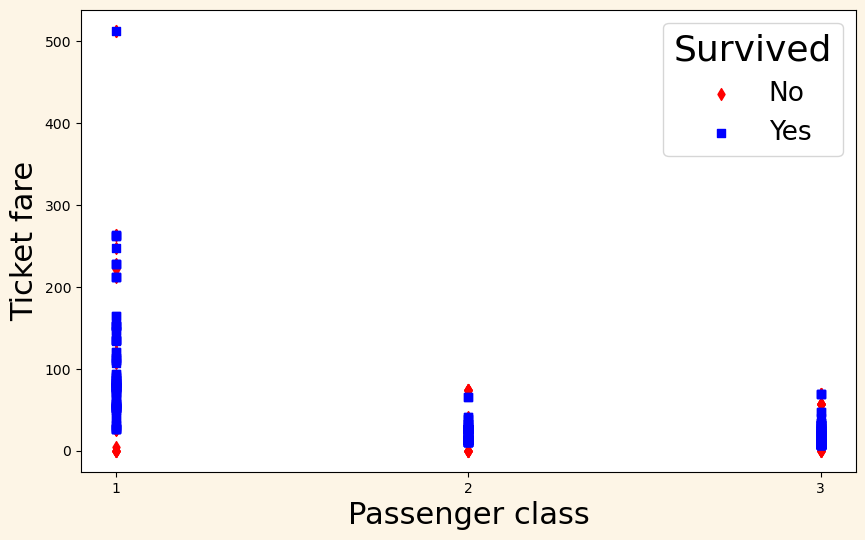

In [31]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
fig.set_facecolor('oldlace')

for i in np.unique(preds):
    j = np.where(preds==i)
    ax.scatter(X[j], Y[j], color=color_dict[i], label=label_dict[i], marker=marker_dict[i], alpha=alpha_dict[i])

ax.set_xlabel('Passenger class', fontsize=22)
ax.set_ylabel('Ticket fare', fontsize=22)
ax.xaxis.set_ticks([1, 2, 3])
ax.legend(title='Survived', fontsize=19, title_fontsize=26);